In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [81]:
df = pd.read_csv("cleaned_data.csv")

In [82]:
df.head()

,cattle-id,price,age,color,breed,weight
0,BLF1118,91000,2.5 years,Red,Red Chittagong,217 kg
1,BLFS232,186000,2.5 years,Non Red,Holstein Friesian Cross,469 kg
2,BLF960,118000,2.5 years,Red,Local,282 kg
3,BLF1091,118000,2.5 years,Red,Local,283 kg
4,BLF1324,125000,2.5 years,Red,Red Chittagong,298 kg


In [83]:
df.shape

(466, 6)

In [84]:
df.isnull().sum()

cattle-id    0
price        0
age          0
color        0
breed        0
weight       0
dtype: int64

In [85]:
df["age_years"] = df["age"]
df["weight_kg"] = df["weight"]

In [86]:
df.drop(columns=["cattle-id","age","weight"],inplace=True)

In [87]:
df.head()

,price,color,breed,age_years,weight_kg
0,91000,Red,Red Chittagong,2.5 years,217 kg
1,186000,Non Red,Holstein Friesian Cross,2.5 years,469 kg
2,118000,Red,Local,2.5 years,282 kg
3,118000,Red,Local,2.5 years,283 kg
4,125000,Red,Red Chittagong,2.5 years,298 kg


In [88]:
def clean_age(data):
    data = data.lower()
    data = data.replace("years","")
    return data

In [89]:
def clean_weight(data):
    data = data.lower()
    data = data.replace("kg","")
    return data

In [90]:
df["age_years"] = df["age_years"].apply(clean_age)
df["weight_kg"] = df["weight_kg"].apply(clean_weight)

In [91]:
df.head()

,price,color,breed,age_years,weight_kg
0,91000,Red,Red Chittagong,2.5,217
1,186000,Non Red,Holstein Friesian Cross,2.5,469
2,118000,Red,Local,2.5,282
3,118000,Red,Local,2.5,283
4,125000,Red,Red Chittagong,2.5,298


In [92]:
df["breed"].value_counts()

breed
Local                      315
Sahiwal                     53
Sindhi                      31
Red Chittagong              30
Holstein Friesian Cross     25
Mir Kadim                    7
Pabna Breed                  5
Name: count, dtype: int64

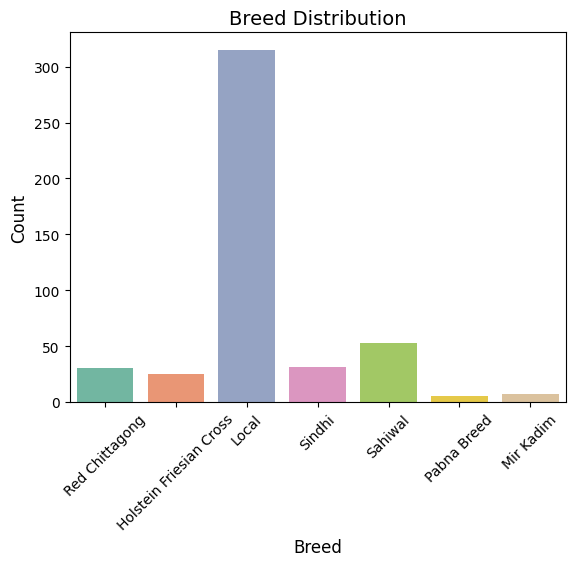

In [93]:
sns.countplot(data=df, x="breed", palette="Set2")
plt.title("Breed Distribution", fontsize=14)
plt.xlabel("Breed", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

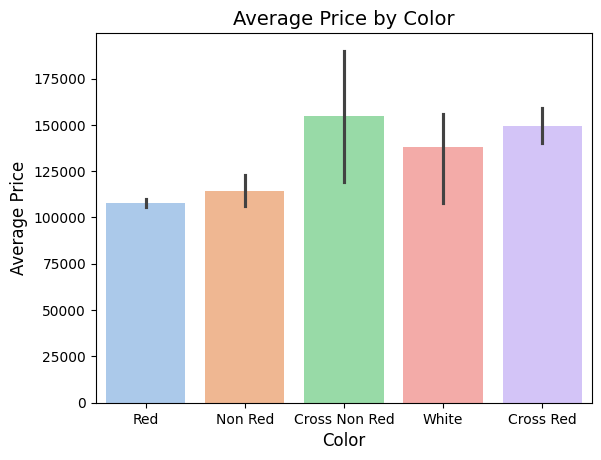

In [94]:
sns.barplot(data=df, x="color", y="price", palette="pastel")
plt.title("Average Price by Color", fontsize=14)
plt.xlabel("Color", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [95]:
df.head()

,price,color,breed,age_years,weight_kg
0,91000,Red,Red Chittagong,2.5,217
1,186000,Non Red,Holstein Friesian Cross,2.5,469
2,118000,Red,Local,2.5,282
3,118000,Red,Local,2.5,283
4,125000,Red,Red Chittagong,2.5,298


In [96]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline

In [97]:
X = df.drop(columns=["price"])
y = df["price"]

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [99]:
transformer = ColumnTransformer(transformers=[
    ('num', StandardScaler(), [2, 3]),
    ('cat', OneHotEncoder(sparse_output=False, drop='first'), [0, 1])
])

In [100]:
transformer.fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [101]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

y_train_2d = y_train.values.reshape(-1, 1)
y_test_2d = y_test.values.reshape(-1, 1)
scaler.fit(y_train_2d)
y_train = scaler.transform(y_train_2d)
y_test = scaler.transform(y_test_2d)


In [107]:
model = LinearRegression()

In [108]:
model.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [109]:
r2 = r2_score(y_pred,y_test)
mae = mean_absolute_error(y_pred,y_test)
mse = mean_squared_error(y_pred,y_test)

In [110]:
print("R2 Score",r2)
print("mae",mse)
print("mse",mse)

R2 Score 0.9904652547998721
mae 0.009229978740783379
mse 0.009229978740783379


In [111]:
import joblib

# ... (After your model.fit and scaler.fit code) ...

# 1. Save the Model
joblib.dump(model, 'animal_price_model.pkl')

# 2. Save the ColumnTransformer (Handles Color/Breed encoding)
joblib.dump(transformer, 'preprocessor.pkl')

# 3. Save the Price Scaler (Handles converting 0.5 -> 91000 PKR)
joblib.dump(scaler, 'price_scaler.pkl')

✅ All files saved successfully!
